# sonar3 data, classification

## Library import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

### random seed

In [2]:
np.random.seed(3)
tf.random.set_seed(3)

### data import

In [3]:
df = pd.read_csv('./data/sonar3.csv', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,0
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,0
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,0
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,0
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,0


In [4]:
df[60].value_counts()

60
1    111
0     97
Name: count, dtype: int64

### feature, target seperate

In [5]:
X = df.iloc[:, 0:60]
y = df.iloc[:, 60]

X, y

(         0       1       2       3       4       5       6       7       8   \
 0    0.0200  0.0371  0.0428  0.0207  0.0954  0.0986  0.1539  0.1601  0.3109   
 1    0.0453  0.0523  0.0843  0.0689  0.1183  0.2583  0.2156  0.3481  0.3337   
 2    0.0262  0.0582  0.1099  0.1083  0.0974  0.2280  0.2431  0.3771  0.5598   
 3    0.0100  0.0171  0.0623  0.0205  0.0205  0.0368  0.1098  0.1276  0.0598   
 4    0.0762  0.0666  0.0481  0.0394  0.0590  0.0649  0.1209  0.2467  0.3564   
 ..      ...     ...     ...     ...     ...     ...     ...     ...     ...   
 203  0.0187  0.0346  0.0168  0.0177  0.0393  0.1630  0.2028  0.1694  0.2328   
 204  0.0323  0.0101  0.0298  0.0564  0.0760  0.0958  0.0990  0.1018  0.1030   
 205  0.0522  0.0437  0.0180  0.0292  0.0351  0.1171  0.1257  0.1178  0.1258   
 206  0.0303  0.0353  0.0490  0.0608  0.0167  0.1354  0.1465  0.1123  0.1945   
 207  0.0260  0.0363  0.0136  0.0272  0.0214  0.0338  0.0655  0.1400  0.1843   
 
          9   ...      50      51     

### train / test split

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13)

### define model

In [7]:
model = Sequential()

# 입력층
model.add(Input(shape=(60,)))  # Input 객체를 첫 레이어로 사용

# 은닉층
model.add(Dense(24, activation="relu"))
model.add(Dense(10, activation="relu"))

# 출력층
model.add(Dense(1, activation="sigmoid"))

In [8]:
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 24)             │         1,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,725 (6.74 KB)

 Trainable params: 1,725 (6.74 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
hist = model.fit(X_train, y_train, epochs=80, batch_size=10)

Epoch 1/80
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5350 - loss: 0.7101   
Epoch 2/80
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5321 - loss: 0.6806 
Epoch 3/80
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5629 - loss: 0.6775 
Epoch 4/80
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1000us/step - accuracy: 0.6524 - loss: 0.6758
Epoch 5/80
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 857us/step - accuracy: 0.6427 - loss: 0.6704
Epoch 6/80
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6752 - loss: 0.6653 
Epoch 7/80
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7657 - loss: 0.6604 
Epoch 8/80
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 928us/step - accuracy: 0.7767 - loss: 0.6558
Epoch 9/80
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 786us/step - accuracy: 0.7797 - loss: 0.6492
Epoch 10/80
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 786us/step - accuracy: 0.7847 - loss: 0.6422
Epoch 11/80
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7773 - loss: 0.6339 
Epoch 12/80
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 714us/step - 

In [11]:
model.evaluate(X_test, y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7789 - loss: 0.4645 


[0.46961575746536255, 0.7777777910232544]

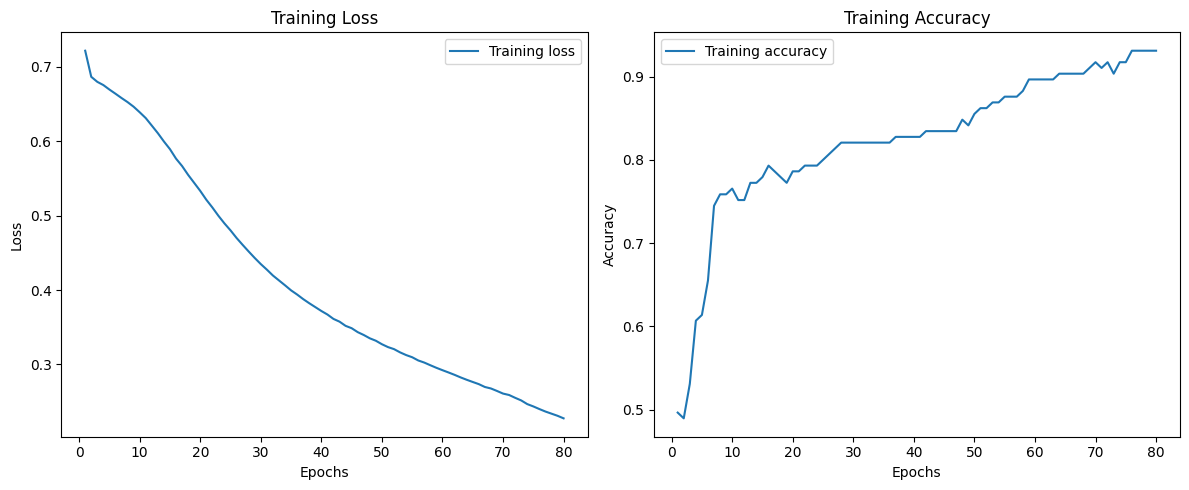

In [12]:
loss = hist.history['loss'] ## loss
accuracy = hist.history['accuracy'] ## accuracy
epochs = range(1, len(loss) + 1) ## epoch
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, loss, label='Training loss')
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, accuracy, label='Training accuracy')
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
plt.show()


# KFold cross validation

In [13]:
df = pd.read_csv("./data/sonar3.csv", header=None)

In [14]:
X = df.iloc[:, 0:60]
y = df.iloc[:, 60]

X, y

(         0       1       2       3       4       5       6       7       8   \
 0    0.0200  0.0371  0.0428  0.0207  0.0954  0.0986  0.1539  0.1601  0.3109   
 1    0.0453  0.0523  0.0843  0.0689  0.1183  0.2583  0.2156  0.3481  0.3337   
 2    0.0262  0.0582  0.1099  0.1083  0.0974  0.2280  0.2431  0.3771  0.5598   
 3    0.0100  0.0171  0.0623  0.0205  0.0205  0.0368  0.1098  0.1276  0.0598   
 4    0.0762  0.0666  0.0481  0.0394  0.0590  0.0649  0.1209  0.2467  0.3564   
 ..      ...     ...     ...     ...     ...     ...     ...     ...     ...   
 203  0.0187  0.0346  0.0168  0.0177  0.0393  0.1630  0.2028  0.1694  0.2328   
 204  0.0323  0.0101  0.0298  0.0564  0.0760  0.0958  0.0990  0.1018  0.1030   
 205  0.0522  0.0437  0.0180  0.0292  0.0351  0.1171  0.1257  0.1178  0.1258   
 206  0.0303  0.0353  0.0490  0.0608  0.0167  0.1354  0.1465  0.1123  0.1945   
 207  0.0260  0.0363  0.0136  0.0272  0.0214  0.0338  0.0655  0.1400  0.1843   
 
          9   ...      50      51     

In [15]:
k=5
kfold = KFold(n_splits=k, shuffle=True)

In [16]:
def model_fn():
    model = Sequential()
    model.add(Input(shape=(60,)))
    model.add(Dense(24, activation="relu"))
    model.add(Dense(10, activation="relu"))
    model.add(Dense(1, activation="sigmoid"))

    return model

In [18]:
acc_score = []

# kfold split -> train_index, test_index
for train_index, test_index in kfold.split(X):

    # define train index, test index
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # model
    model = model_fn()
    
    # compile
    model.compile(loss="binary_crossentropy", optimizer='adam', metrics=['accuracy'])

    # train
    hist = model.fit(X_train, y_train, epochs=200, batch_size=10, verbose=0)

    # accuracy
    accuracy = model.evaluate(X_test, y_test)
    print(accuracy)
    acc_score.append(accuracy[1])

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7897 - loss: 0.6313 
[0.5844548344612122, 0.8095238208770752]
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8631 - loss: 0.3969 
[0.427052766084671, 0.8571428656578064]
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8264 - loss: 0.9500 
[0.8704398274421692, 0.8333333134651184]
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7703 - loss: 0.6654 
[0.6315514445304871, 0.7804877758026123]
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7866 - loss: 0.9238 
[0.8463402986526489, 0.8048780560493469]


In [19]:
acc_score

[0.8095238208770752,
 0.8571428656578064,
 0.8333333134651184,
 0.7804877758026123,
 0.8048780560493469]

In [20]:
avg_acc_score = sum(acc_score) / k
print(avg_acc_score)

0.8170731663703918
